In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

rng = np.random.RandomState(0)

In [2]:
X, y, coef = make_regression(
    n_samples=200, n_features=1, noise=4.0, coef=True, random_state=0)
X[:4] = rng.uniform(10, 20, (4, 1))
y[:4] = rng.uniform(10, 20, 4)

In [6]:
X[:4] = rng.uniform(10, 20, (4, 1))
y[:4] = rng.uniform(10, 20, 4)

Text(0, 0.5, 'Y Values->')

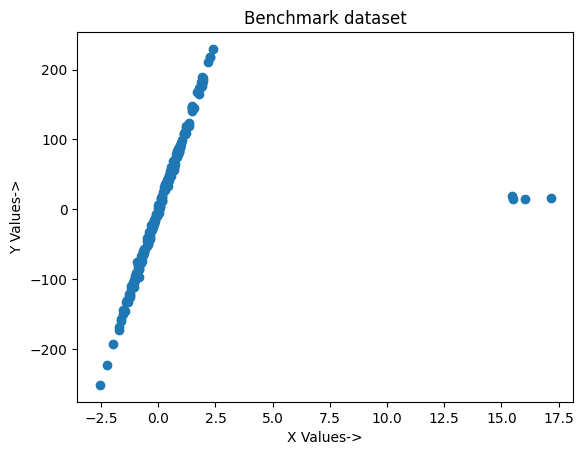

In [7]:
plt.scatter(X,y)
plt.title('Benchmark dataset')
plt.xlabel('X Values->')
plt.ylabel('Y Values->')

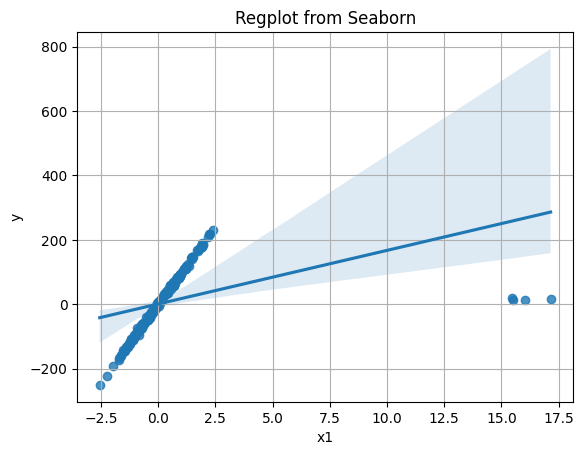

In [33]:
import pandas as pd
data = pd.concat([pd.Series(X.ravel()), pd.Series(y)], axis=1)
data.columns = ['x1', 'y']
import seaborn as sns
sns.regplot(data=data, x="x1", y='y')
plt.title("Regplot from Seaborn")
plt.grid()

In [23]:
# data.to_csv("outlier_dataset.csv", index=False)

In [24]:
data

,x1,y
0,15.488135,14.236548
1,17.151894,16.458941
2,16.027634,14.375872
3,15.448832,18.917730
4,1.139401,108.474556
...,...,...
195,0.410599,39.445566
196,-1.079932,-110.308406
197,-0.870797,-79.690180
198,0.978738,94.976669


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import make_regression

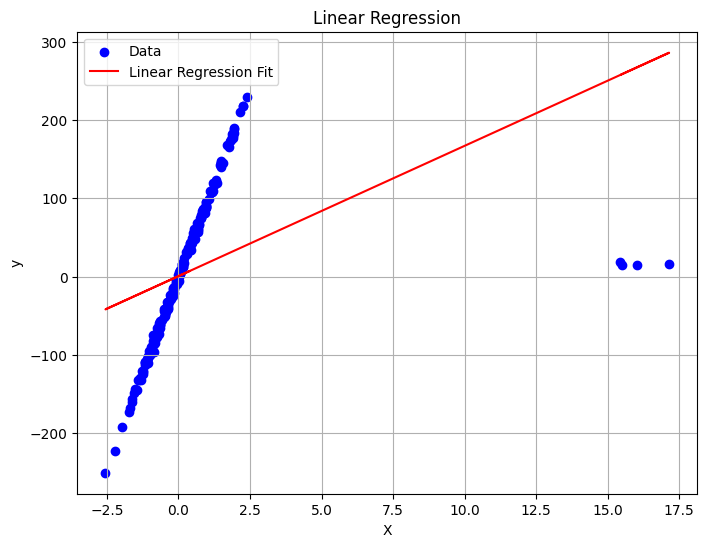

In [28]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred_linear = linear_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression Fit')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

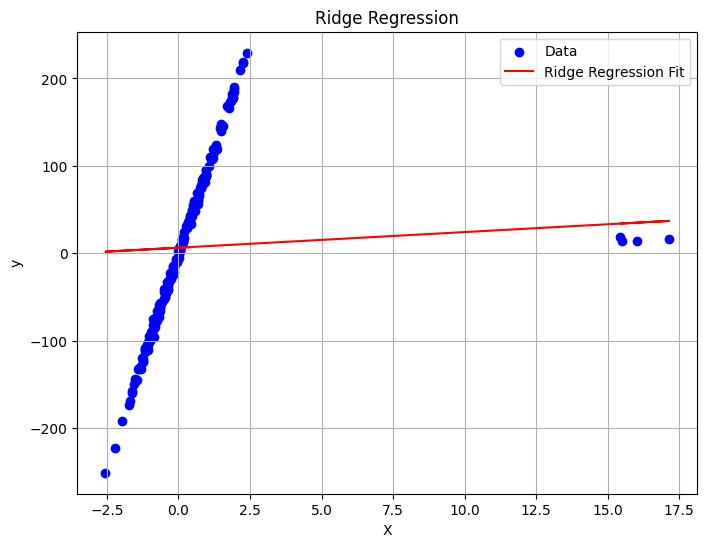

In [37]:
# Ridge Regression
ridge_reg = Ridge(alpha=10000)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_ridge, color='red', label='Ridge Regression Fit')
plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

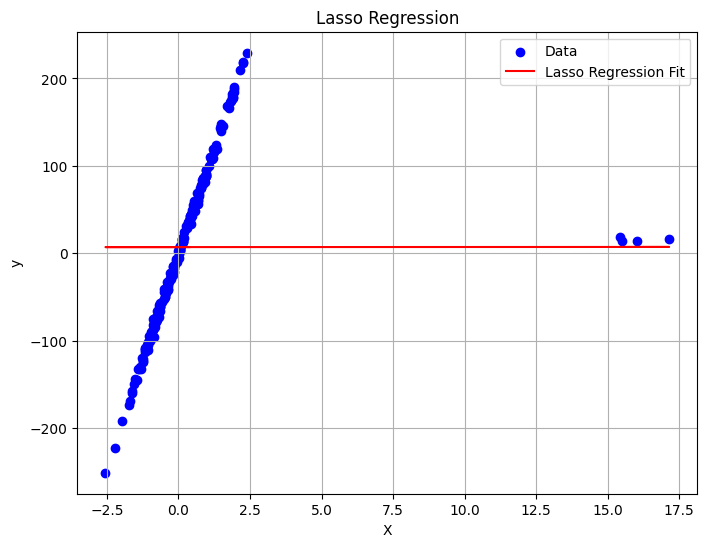

In [35]:

# Lasso Regression
lasso_reg = Lasso(alpha=100)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_lasso, color='red', label='Lasso Regression Fit')
plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


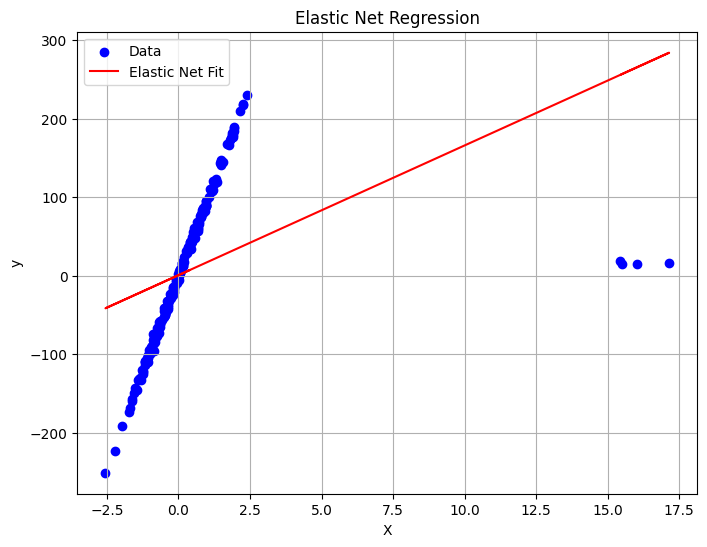

In [31]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
y_pred_elastic_net = elastic_net.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred_elastic_net, color='red', label='Elastic Net Fit')
plt.title('Elastic Net Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

lin reg:    RMSE 87.8; MAE - 70.5; MeAE - 61.1
Huber loss: RMSE 211;  MAE - 33.3; MeAE - 3.1
Theil       RMSE 216;  MAE - 33.6; MeAE - 2.9 

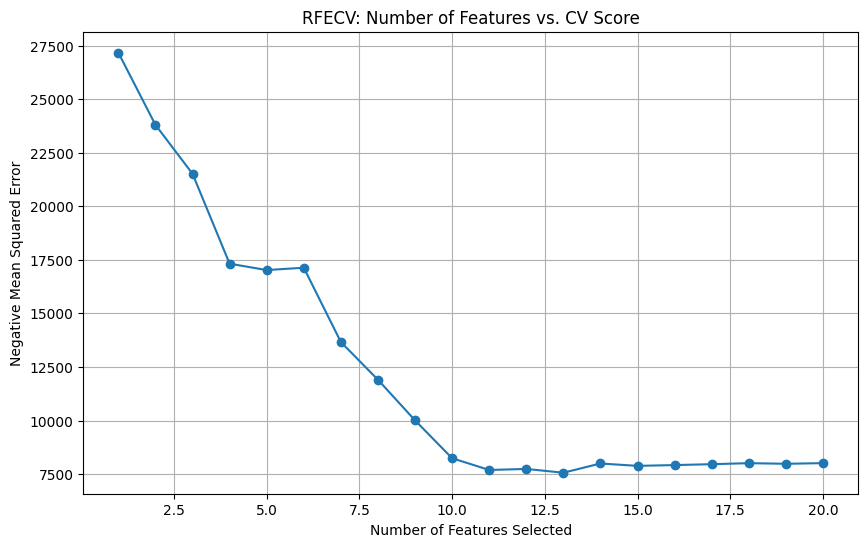

(np.int64(13),
 array([1, 6, 1, 1, 7, 8, 2, 1, 1, 1, 3, 1, 5, 1, 1, 4, 1, 1, 1, 1]),
 array([ True, False,  True,  True, False, False, False,  True,  True,
         True, False,  True, False,  True,  True, False,  True,  True,
         True,  True]))

In [39]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Generate synthetic data with 20 features, 7 informative
X, y = make_regression(
    n_samples=200, 
    n_features=20, 
    n_informative=7, 
    noise=4.0, 
    random_state=0
)

# Introduce redundancy by making two features highly correlated with others
X[:, 7] = X[:, 0] * 0.9 + X[:, 1] * 0.1  # Feature 8 correlated with Feature 1 and 2
X[:, 8] = X[:, 2] * 0.7 + X[:, 3] * 0.3  # Feature 9 correlated with Feature 3 and 4

# Initialize the Linear Regression model
model = LinearRegression()

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Initialize RFECV with LinearRegression
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_squared_error')

# Fit RFECV
rfecv.fit(X, y)

# Print the optimal number of features and their ranking
optimal_features = rfecv.n_features_
feature_ranking = rfecv.ranking_
important_features = rfecv.support_
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), -rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Negative Mean Squared Error")
plt.title("RFECV: Number of Features vs. CV Score")
plt.grid(True)
plt.show()

optimal_features, feature_ranking, important_features


In [78]:
# Initialize the Linear Regression model
model = LinearRegression()

# Define cross-validation strategy
# cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Initialize RFECV with LinearRegression
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=8)

# Fit RFECV
rfecv.fit(X, y)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=8,
      scoring='neg_mean_squared_error')

In [79]:
X.shape

(200, 20)

In [80]:
optimal_features = rfecv.n_features_
feature_ranking = rfecv.ranking_
important_features = rfecv.support_

In [81]:
optimal_features, feature_ranking, important_features


(np.int64(8),
 array([ 1, 11,  1,  4, 12, 13,  7,  1,  3,  5,  8,  1, 10,  2,  1,  9,  6,
         1,  1,  1]),
 array([ True, False,  True, False, False, False, False,  True, False,
        False, False,  True, False, False,  True, False, False,  True,
         True,  True]))

In [99]:
data.drop('y', axis=1).loc[:, important_features]

,x1,x3,x8,x12,x15,x18,x19,x20
0,-1.572796,-0.392821,-1.448793,-0.057281,2.337410,1.523771,0.095412,-0.336274
1,0.079122,-1.133593,-0.032850,0.096004,-0.643258,-0.148766,1.587762,0.996760
2,0.037996,1.336386,0.099201,-0.046481,-0.496608,0.461469,-0.268010,-0.120041
3,0.232181,-0.463596,0.251589,0.063262,-0.345982,-1.540797,-0.955945,0.481481
4,0.852830,-0.013451,0.861405,0.480970,-0.374126,0.410602,0.152177,0.815472
...,...,...,...,...,...,...,...,...
195,0.564211,-0.388643,0.493925,-1.551441,0.101061,-0.179082,0.526782,-0.646792
196,-1.818078,-0.422315,-1.614773,0.201480,0.892474,0.228053,0.555963,0.104714
197,0.724369,-0.361599,0.537171,0.433108,-0.144567,-0.937880,0.359504,1.064585
198,0.553132,-0.908763,0.396015,-2.655619,1.029439,0.862596,0.771406,-0.424318


In [91]:
rfecv.cv_results_

{'mean_test_score': array([-23489.45990141, -18455.76091813, -14985.72629671, -10575.42641882,
         -7986.06711783,  -7821.56857337,  -8047.12843385,  -7816.92395638,
         -7887.82911517,  -8010.0911598 ,  -7854.27216557,  -7932.78571112,
         -7928.43791799,  -7984.14247204,  -8033.37902871,  -8063.11214212,
         -8071.84372652,  -8058.58216417,  -8030.17621604,  -8029.4399429 ]),
 'std_test_score': array([4449.28406143, 2666.70576554, 3015.47926304, 1200.82186734,
         723.79947108, 1051.9872747 ,  988.02122034,  999.7866052 ,
         968.46880379,  886.24461571,  818.68570045,  785.84063829,
         773.31930305,  877.0406777 ,  858.2906079 ,  883.09830633,
         841.01731868,  859.44265375,  863.8147323 ,  863.69606806]),
 'split0_test_score': array([-19242.45765069, -15349.76127855, -11269.90520521,  -9292.40035888,
         -7790.35115335,  -9013.31304554,  -8720.48639812,  -8741.13540787,
         -8735.69030651,  -8735.69030651,  -8128.16101266,  -8573.

In [92]:
pd.DataFrame(rfecv.cv_results_)

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,n_features
0,-23489.459901,4449.284061,-19242.457651,-27222.988661,-30236.741931,-21384.578101,-19360.533164,1
1,-18455.760918,2666.705766,-15349.761279,-19464.231577,-22993.344219,-16421.560369,-18049.907147,2
2,-14985.726297,3015.479263,-11269.905205,-15952.726857,-19832.279029,-12350.378888,-15523.341504,3
3,-10575.426419,1200.821867,-9292.400359,-11093.782466,-12581.704168,-9455.086950,-10454.158152,4
4,-7986.067118,723.799471,-7790.351153,-9382.846403,-7889.683625,-7506.811817,-7360.642591,5
5,-7821.568573,1051.987275,-9013.313046,-9039.433173,-6366.972462,-7173.676743,-7514.447443,6
6,-8047.128434,988.021220,-8720.486398,-9043.375232,-6467.103888,-7318.773714,-8685.902937,7
7,-7816.923956,999.786605,-8741.135408,-7547.366290,-6467.103888,-7162.659844,-9166.354352,8
8,-7887.829115,968.468804,-8735.690307,-7553.224907,-6488.452558,-7462.565274,-9199.212530,9
9,-8010.091160,886.244616,-8735.690307,-7939.783606,-6713.204082,-7462.565274,-9199.212530,10


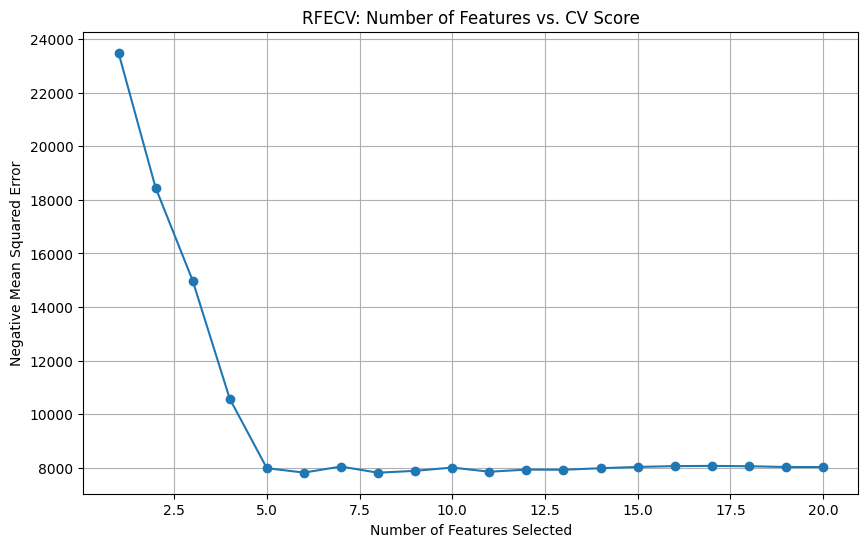

In [93]:
# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), -rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Negative Mean Squared Error")
plt.title("RFECV: Number of Features vs. CV Score")
plt.grid(True)
plt.show()

In [47]:
data = pd.DataFrame(X, columns=[f"x{i}" for i in range(1, 21)])
data['y'] = y
# data.to_csv("data_feature_selection.csv")

In [48]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-1.572796,-0.332759,-0.392821,-1.259596,0.826126,1.226664,-0.217163,-1.448793,-0.652853,-0.057757,...,-0.057281,0.561450,-0.838311,2.337410,-0.204008,0.666355,1.523771,0.095412,-0.336274,32.488872
1,0.079122,-1.040599,-1.133593,1.238007,-1.011774,0.850531,-1.373054,-0.032850,-0.422113,0.084968,...,0.096004,-0.010056,0.757468,-0.643258,-0.315603,-0.839124,-0.148766,1.587762,0.996760,24.748279
2,0.037996,0.650042,1.336386,-0.843616,0.766990,1.714051,0.003583,0.099201,0.682386,-1.026007,...,-0.046481,-0.050083,1.483129,-0.496608,-0.364170,-0.767949,0.461469,-0.268010,-0.120041,47.960983
3,0.232181,0.426259,-0.463596,-2.069985,-1.424061,-0.597316,0.416050,0.251589,-0.945513,-0.493320,...,0.063262,1.494485,0.781198,-0.345982,0.676908,-0.237922,-1.540797,-0.955945,0.481481,-167.823931
4,0.852830,0.938585,-0.013451,1.239941,-0.726366,0.669562,-0.608815,0.861405,0.362566,-0.172459,...,0.480970,1.951761,1.925806,-0.374126,-1.019251,1.004419,0.410602,0.152177,0.815472,14.316381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.564211,-0.138646,-0.388643,0.708520,-0.070340,-0.102437,-0.903691,0.493925,-0.059494,0.797795,...,-1.551441,1.136593,2.078230,0.101061,0.924020,-0.619805,-0.179082,0.526782,-0.646792,69.613899
196,-1.818078,0.214966,-0.422315,-1.678688,-1.000330,-0.049324,1.563405,-1.614773,-0.799227,1.673986,...,0.201480,0.224252,-0.907300,0.892474,0.097219,0.239034,0.228053,0.555963,0.104714,130.330656
197,0.724369,-1.147611,-0.361599,0.094192,0.441033,1.385262,0.240788,0.537171,-0.224862,0.178793,...,0.433108,-0.198399,0.412871,-0.144567,-0.358114,-0.303098,-0.937880,0.359504,1.064585,-22.257019
198,0.553132,-1.018042,-0.908763,-0.514234,-1.029935,-0.045704,1.298022,0.396015,-0.790404,-0.349943,...,-2.655619,-0.658553,-0.073925,1.029439,-0.077855,0.220508,0.862596,0.771406,-0.424318,117.910520


In [52]:
(
data
.corr()
.round(3)
.sort_values('y', ascending=False)
.style
.background_gradient()
 )

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
y,-0.029000,-0.002000,0.387000,0.013000,-0.014000,-0.034000,0.155000,-0.029000,0.359000,0.001000,-0.007000,0.162000,0.106000,0.067000,0.386000,-0.127000,-0.011000,0.307000,0.511000,0.361000,1.000000
x19,0.068000,0.069000,-0.051000,-0.006000,-0.017000,-0.039000,0.160000,0.076000,-0.049000,0.005000,0.026000,0.133000,-0.010000,0.008000,0.108000,-0.009000,-0.060000,-0.002000,1.000000,0.069000,0.511000
x3,-0.035000,0.021000,1.000000,0.040000,0.134000,-0.076000,0.071000,-0.033000,0.929000,0.045000,-0.041000,-0.088000,0.076000,0.009000,-0.046000,-0.084000,0.095000,-0.021000,-0.051000,-0.037000,0.387000
x15,0.019000,-0.040000,-0.046000,0.081000,0.008000,0.033000,0.015000,0.015000,-0.012000,-0.036000,0.017000,-0.053000,0.071000,-0.077000,1.000000,-0.015000,-0.038000,0.079000,0.108000,-0.005000,0.386000
x20,0.023000,-0.037000,-0.037000,-0.022000,-0.164000,0.055000,0.010000,0.019000,-0.042000,0.054000,-0.017000,0.050000,0.051000,0.000000,-0.005000,-0.083000,0.025000,0.015000,0.069000,1.000000,0.361000
x9,-0.038000,0.032000,0.929000,0.407000,0.115000,-0.072000,0.013000,-0.035000,1.000000,0.070000,-0.063000,-0.089000,0.027000,0.058000,-0.012000,-0.085000,0.072000,-0.031000,-0.049000,-0.042000,0.359000
x18,0.023000,-0.069000,-0.021000,-0.034000,-0.100000,-0.007000,-0.034000,0.015000,-0.031000,0.091000,0.058000,-0.026000,0.088000,0.009000,0.079000,-0.081000,0.002000,1.000000,-0.002000,0.015000,0.307000
x12,-0.030000,0.093000,-0.088000,-0.022000,0.013000,-0.018000,0.106000,-0.020000,-0.089000,0.052000,-0.002000,1.000000,0.003000,0.035000,-0.053000,0.014000,0.036000,-0.026000,0.133000,0.050000,0.162000
x7,-0.050000,-0.038000,0.071000,-0.142000,0.061000,-0.095000,1.000000,-0.055000,0.013000,-0.023000,0.165000,0.106000,-0.027000,0.001000,0.015000,-0.098000,0.003000,-0.034000,0.160000,0.010000,0.155000
x13,-0.044000,0.005000,0.076000,-0.116000,0.035000,0.061000,-0.027000,-0.044000,0.027000,0.011000,0.138000,0.003000,1.000000,-0.020000,0.071000,-0.075000,0.101000,0.088000,-0.010000,0.051000,0.106000
